In [ ]:
# 데이터 : 넘파티, 판다스, 트레인테스트스플릿
import numpy as np         
import pandas as pd
from sklearn.model_selection import train_test_split

# 시각화 : 맷플랏립.파이플랏, 시본
import matplotlib.pyplot as plt
import seaborn as sns

# 정규화 : 사이킷런,프리프로세싱 스탠다드스케일러
from sklearn.preprocessing import StandardScaler

# 학습모델 : 사이킷런 리니어모델 / 리니어, 로지스틱 -리그레션
from sklearn.linear_model import LinearRegression, LogisticRegression #회귀와분류(클래스분류)

# 결정트리 : 사이킷런트리   - 디시전트리클레시파이어, 디시전트리리그레서  플랏_트리
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # 회귀와분류
from sklearn.tree import plot_tree

#
from sklearn.metrics import *                # mean_squared_error  #MAE ,,,

In [ ]:
wine = pd.read_csv('https://bit.ly/wine-date')

In [ ]:
wine.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe() , wine.columns

(           alcohol        sugar           pH        class
 count  6497.000000  6497.000000  6497.000000  6497.000000
 mean     10.491801     5.443235     3.218501     0.753886
 std       1.192712     4.757804     0.160787     0.430779
 min       8.000000     0.600000     2.720000     0.000000
 25%       9.500000     1.800000     3.110000     1.000000
 50%      10.300000     3.000000     3.210000     1.000000
 75%      11.300000     8.100000     3.320000     1.000000
 max      14.900000    65.800000     4.010000     1.000000,
 Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object'))

In [ ]:
X = wine[['alcohol', 'sugar','pH']]
y = wine['class']
X,y

(      alcohol  sugar    pH
 0         9.4    1.9  3.51
 1         9.8    2.6  3.20
 2         9.8    2.3  3.26
 3         9.8    1.9  3.16
 4         9.4    1.9  3.51
 ...       ...    ...   ...
 6492     11.2    1.6  3.27
 6493      9.6    8.0  3.15
 6494      9.4    1.2  2.99
 6495     12.8    1.1  3.34
 6496     11.8    0.8  3.26
 
 [6497 rows x 3 columns], 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 6492    1.0
 6493    1.0
 6494    1.0
 6495    1.0
 6496    1.0
 Name: class, Length: 6497, dtype: float64)

In [ ]:
np.unique(y)  # 중복제거 > 영,일 두개만 있구나 알 수 있다

array([0., 1.])

In [ ]:
s_x = StandardScaler().fit_transform(X)


In [ ]:
t_x, tt_x, t_y, tt_y = train_test_split ( s_x,    y,   test_size=0.3,  random_state=42)


In [ ]:
# 분류문제다! > 분류지만 회귀로 풀 수 있는 로지스틱 회귀를 하자

In [ ]:
lr = LogisticRegression()
lr.fit(t_x,t_y)  

LogisticRegression()

In [ ]:
lr.score ( t_x, t_y ) , lr.score ( tt_x, tt_y )

(0.7842533538596878, 0.7707692307692308)

In [ ]:
print(lr.coef_)   #기울기
print()
print(lr.intercept_) #절편

[[ 0.53484041  1.66731798 -0.70532389]]

[1.81916284]


In [ ]:
# 결정트리    참거짓>참거짓>참거짓  분류 or 회귀?

In [ ]:
d_tree = DecisionTreeClassifier( random_state=42 )  #결정트리모델 선언
d_tree.fit ( t_x, t_y ) 


DecisionTreeClassifier(random_state=42)

In [ ]:
d_tree.score ( t_x, t_y ) , d_tree.score ( tt_x, tt_y )

(0.9971409720694964, 0.8605128205128205)

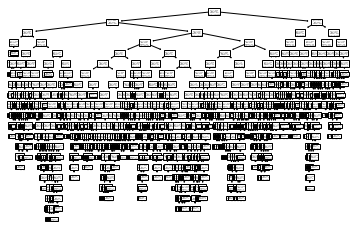

In [ ]:
from sklearn.tree import plot_tree
# plt.figur(figsize=(10,7)) 이건생략가능
plot_tree(d_tree)
plt.show()

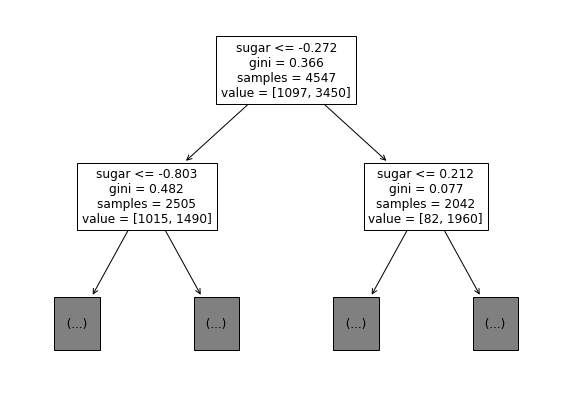

In [ ]:
#가지치기 :깊이를정해줌 더 안내려가게
plt.figure(figsize=(10,7)) #작게나오니까크게
plot_tree ( d_tree ,  max_depth=1 , feature_names=['alcohol', 'sugar', 'pH'] )
plt.show()

In [ ]:
d_tree1 = DecisionTreeClassifier ( max_depth=3  , random_state = 42)
d_tree1.fit( t_x, t_y )
d_tree1.score( t_x, t_y )  ,  d_tree1.score(tt_x, tt_y)


(0.8493512205850011, 0.84)

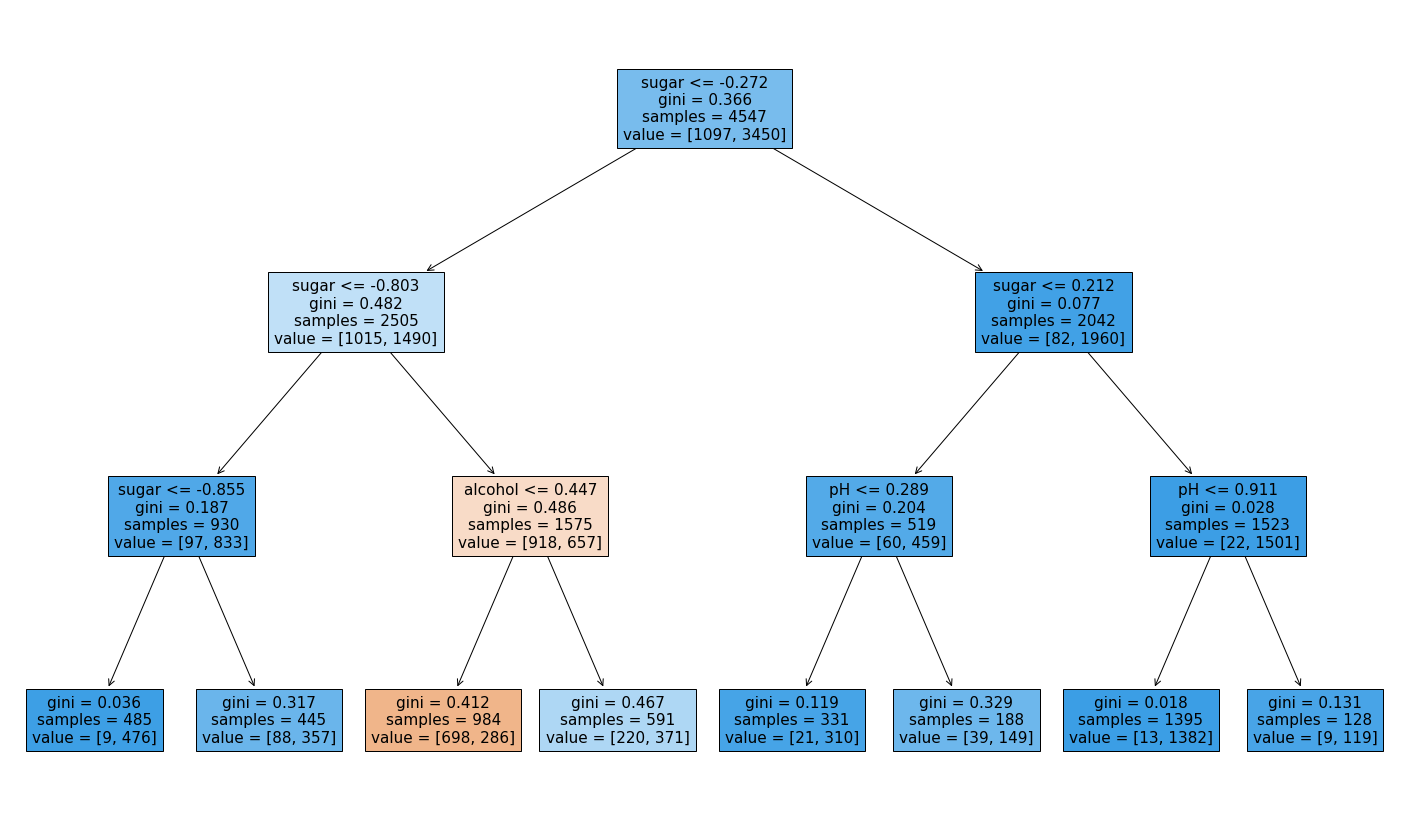

In [ ]:
#가지치기 :깊이를정해줌 더 안내려가게
plt.figure(figsize=(25,15)) #작게나오니까크게
plot_tree ( d_tree1   , feature_names=['alcohol', 'sugar', 'pH'] , filled=True)
plt.show()

# 슈가가 -0.272랑비교 해서 크냐작냐로 나누겟다
